In [1]:
import pandas as pd
import os

In [2]:
# Copy from problem_2
def read_all_shop_info(data_dir):
  df_list = []
  filename_list = sorted([os.path.join(data_dir,f) for f in os.listdir(data_dir)])
  for filepath in filename_list:
    df_list.append(pd.read_csv(filepath, sep = '\t'))
  df = pd.concat(df_list)
  df.drop_duplicates(subset='Tên cửa hàng', inplace = True)
  df.reset_index(drop = True, inplace = True)
  return df

In [3]:
# Copy from problem_2
df = read_all_shop_info('NewData')

In [4]:
# Copy from problem_2
def get_menu_stat(store_name):
  menufile_path = os.path.join(os.getcwd(), 'NewMenuStore', store_name)
  try:
    df = pd.read_csv(menufile_path, encoding = 'utf-8')
    df['Price'] = df['Price'].str.replace(',','').astype(int)
    return df.shape[0], df['Price'].mean()
  except:
    try:
      df = pd.read_csv(menufile_path + '.txt', encoding = 'utf-8')
      df['Price'] =df['Price'].str.replace(',','').astype(int)
      return df.shape[0], df['Price'].mean()
    except:
      print('{} doesnt have menu info file'.format(store_name))
      return 0, 0

In [5]:
# Copy from problem_2
temp_df = df.apply(lambda x\
  : get_menu_stat(x['Tên cửa hàng']) if x['Cửa hàng có menu'] == 1 else 0, axis = 1, result_type = 'expand')
df['Tổng số lượng sản phẩm'] = temp_df.iloc[:,0].astype(int)
df['Giá trung bình'] = temp_df.iloc[:,1].round(2)

 Lẩu Dê Hoàng Diệu - Hoàng Diệu doesnt have menu info file
 Ăn Vặt Cô Bông - Đồ Ăn Vặt - Xuân Đỉnh doesnt have menu info file
Roma Pizza doesnt have menu info file
​​​​​​​Bento Delivery - Cơm Gà Xối Mỡ Chính Thống Sốt Mắm Tỏi - Hòa Hiệp doesnt have menu info file
Cá Viên Chiên 333 - Nguyễn Biểu doesnt have menu info file


In [6]:
# Copy from problem_2
df['Số sao trên Foody'] = df['Số sao trên Foody'].replace('<span>_._</span>','0')
#Xử lý tên cửa hàng
df['Tên cửa hàng'] = df['Tên cửa hàng'].replace('&amp;', 'Và')
#Xử lý lượt đánh giá
df['Số lượt đánh giá trên ShopeeFood'] = df['Số lượt đánh giá trên ShopeeFood'].apply(lambda x: '< 100' if x not in ['100+','500+','999+'] else x)
#Xử lý Phí dịch vụ
df['Phí dịch vụ'] = df['Phí dịch vụ'].apply(lambda x: 'Unknown' if x == 'ShopeeFood</span' else x)
df['Số sao trên Foody'] = df['Số sao trên Foody'].astype('float64')
df['Số lượt đánh giá trên Foody'] = df['Số lượt đánh giá trên Foody'].replace(',','', regex=True).astype(int)
df['Giá thấp nhất'] = df['Giá thấp nhất'].replace(',','', regex=True).astype(int)
df['Giá cao nhất'] = df['Giá cao nhất'].replace(',','', regex=True).astype(int)
df['Thời gian mở cửa'] = df['Thời gian mở cửa'].apply(lambda x: 'Unknown' if x == '0' else x)

## Loại các cửa hàng không ở TP. HCM

In [7]:
df = df[df['Địa chỉ cửa hàng'].str.contains("HCM")]
df = df.dropna()

## Thêm cột "Thành công"

In [8]:
df['Thành công'] = (df['Số sao trên ShopeeFood'] >= 4.5) & \
    (df['Số lượt đánh giá trên ShopeeFood'] == '999+') & \
    (df['Số sao trên Foody'] > 7.0) & \
    (df['Số lượt đánh giá trên Foody'] > 10)

<AxesSubplot: >

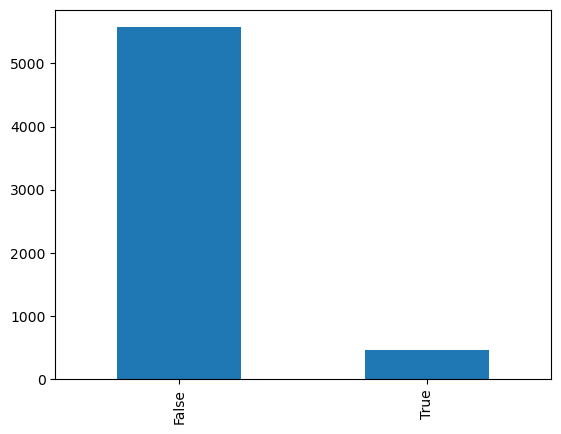

In [9]:
df['Thành công'].value_counts().plot.bar()

## Chỉnh sửa cột "Loại cửa hàng"

Các loại cửa hàng có số lượng quá ít <50 sẽ gán thành "Khác"

In [10]:
df_type_count = df['Loại cửa hàng'].value_counts()
df_type_count

Quán ăn                              2558
Café/Dessert                         1441
Ăn vặt/vỉa hè                         789
Nhà hàng                              345
Shop Online                           286
Tiệm bánh                             177
Ăn chay                                89
Café/Dessert, Quán ăn                  51
Ăn vặt/vỉa hè, Shop Online             34
Quán ăn, Ăn vặt/vỉa hè                 33
Quán ăn, Giao cơm văn phòng            20
Café/Dessert, Ăn vặt/vỉa hè            19
Shop/Cửa hàng                          18
Café/Dessert, Tiệm bánh                18
Quán nhậu                              14
Quán ăn, Shop Online                   14
Nhà hàng, Quán ăn                      11
Tiệm bánh, Ăn vặt/vỉa hè                9
Nhà hàng, Café/Dessert                  9
Nhà hàng, Ăn chay                       7
Café/Dessert, Shop Online               7
Quán ăn, Ăn chay                        6
Quán ăn, Tiệm bánh                      6
Giao cơm văn phòng                

In [11]:
df.loc[
    df['Loại cửa hàng'].isin(df_type_count[df_type_count < 50].index),
    'Loại cửa hàng'
] = 'Khác'

In [12]:
df['Loại cửa hàng'].value_counts()

Quán ăn                  2558
Café/Dessert             1441
Ăn vặt/vỉa hè             789
Nhà hàng                  345
Khác                      292
Shop Online               286
Tiệm bánh                 177
Ăn chay                    89
Café/Dessert, Quán ăn      51
Name: Loại cửa hàng, dtype: int64

<AxesSubplot: >

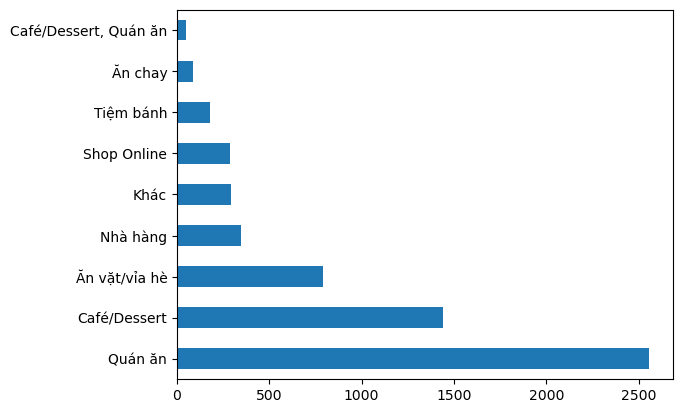

In [13]:
df['Loại cửa hàng'].value_counts().plot.barh()

## Thêm cột "Quận"

In [14]:
districts = [
    'Quận 1', 'Quận 3', 'Quận 4', 'Quận 5', 'Quận 6', 'Quận 7', 'Quận 8', 'Quận 10', 'Quận 11', 'Quận 12',
    'Bình Thạnh', 'Gò Vấp', 'Phú Nhuận','Tân Bình', 'Tân Phú', 'Bình Tân', 
    'Bình Chánh', 'Cần Giờ', 'Củ Chi', 'Hóc Môn', 'Nhà Bè',
    'Quận 9', 'Quận 2', 'Thủ Đức'
]

In [15]:
def get_district(df):
    for d in districts:
        if d in df['Địa chỉ cửa hàng']:
            return d
    return None

In [16]:
df['Quận'] = df.apply(get_district, axis=1)

In [17]:
df['Quận'].value_counts()

Quận 1        1093
Bình Thạnh     643
Phú Nhuận      595
Thủ Đức        446
Gò Vấp         429
Tân Bình       411
Quận 3         367
Quận 7         272
Bình Tân       238
Quận 4         225
Quận 8         222
Quận 5         201
Tân Phú        190
Quận 6         180
Nhà Bè         162
Quận 9         139
Quận 2         134
Bình Chánh      47
Hóc Môn         33
Name: Quận, dtype: int64

<AxesSubplot: >

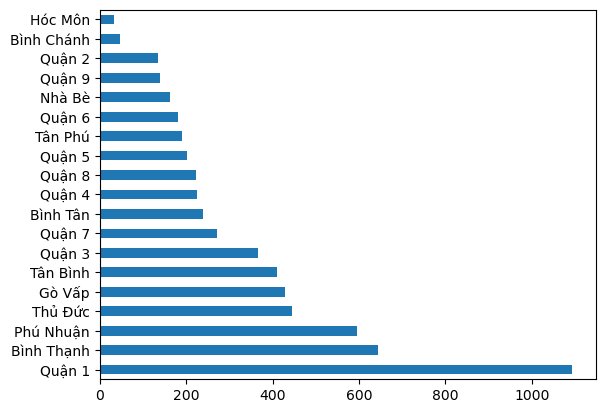

In [18]:
df['Quận'].value_counts().plot.barh()

## Thêm cột "Khoảng giá"

In [19]:
def get_price_range(df):
    if df['Giá trung bình'] <= 50_000:
        return '< 50k'
    elif df['Giá trung bình'] <= 100_000:
        return '50k - 100k'
    elif df['Giá trung bình'] <= 200_000:
        return '100k - 200k'
    else:
        return '> 200k'

In [20]:
df['Khoảng giá'] = df.apply(get_price_range, axis=1)

<AxesSubplot: >

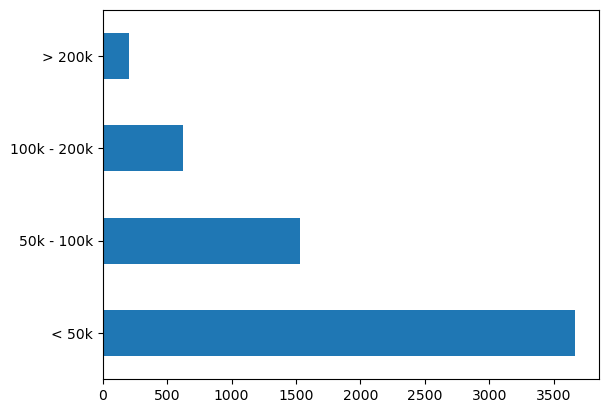

In [21]:
df['Khoảng giá'].value_counts().plot.barh()

## Thêm cột "Số lượng món"

In [22]:
def get_disk_no_range(df):
    if df['Tổng số lượng sản phẩm'] <= 10:
        return '< 10'
    elif df['Tổng số lượng sản phẩm'] <= 20:
        return '10 - 20'
    elif df['Tổng số lượng sản phẩm'] <= 50:
        return '20 - 50'
    elif df['Tổng số lượng sản phẩm'] <= 100:
        return '50 - 100'
    elif df['Tổng số lượng sản phẩm'] <= 200:
        return '100 - 200'
    else:
        return '> 200'

In [23]:
df['Số lượng món'] = df.apply(get_disk_no_range, axis=1)

<AxesSubplot: >

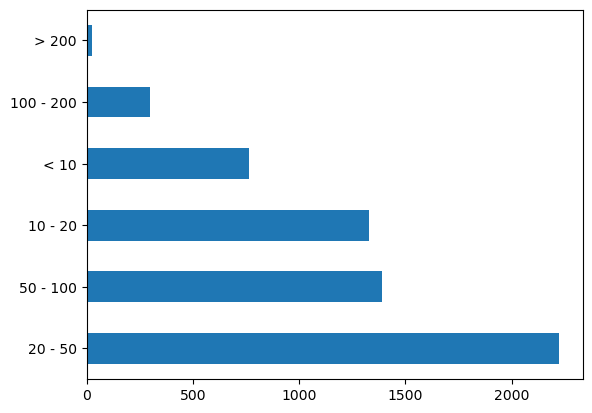

In [24]:
df['Số lượng món'].value_counts().plot.barh()

## Thêm cột "Thời gian mở cửa"

In [25]:
from datetime import datetime

In [26]:
def to_datetime(s):
    return datetime.strptime(s, '%H:%M')

In [27]:
def get_time_range(df):
    try:
        start, *_, end = str(df['Thời gian mở cửa']).split('-')
        diff = to_datetime(end.strip()) - to_datetime(start.strip())
        return diff.seconds // 3600
    except:
        return None

In [28]:
df['Khoảng thời gian mở cửa'] = df.apply(get_time_range, axis=1)

<AxesSubplot: >

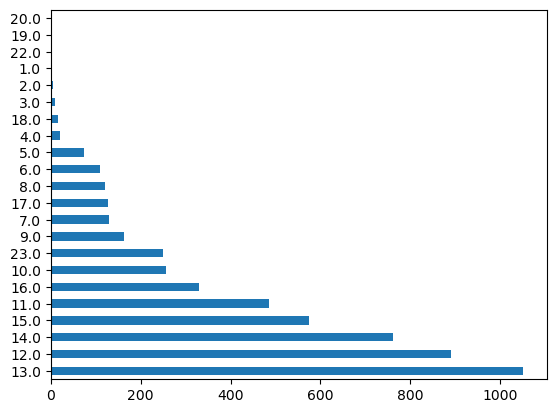

In [29]:
df['Khoảng thời gian mở cửa'].value_counts().plot.barh()

## Lưu data

In [30]:
df.to_csv('dataset.csv', sep='\t', index=False)